In [1]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt

In [3]:
!pip install numpy

In [4]:
!pip install pandas 

In [5]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('combined_data_1.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
data['Rating'] = data['Rating'].astype(float)
print('Data shape: {}'.format(data.shape))
print(data.iloc[::5000000, :])

Data shape: (24058263, 2)
          Cust_Id  Rating
0              1:     NaN
5000000   2560324     4.0
10000000  2271935     2.0
15000000  1921803     2.0
20000000  1933327     3.0


In [7]:
merge_dataset_nan = pd.DataFrame(pd.isnull(data.Rating))
merge_dataset_nan = merge_dataset_nan[merge_dataset_nan['Rating'] == True]
merge_dataset_nan = merge_dataset_nan.reset_index()

movie_np = []
movie_id = 1

for i,j in zip(merge_dataset_nan['index'][1:],merge_dataset_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(data) - merge_dataset_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [8]:
data.to_csv('data.csv', index=False)


In [9]:

movie_count = data.isnull().sum()[1]

cust_count = data['Cust_Id'].nunique() - movie_count

rating_count = data['Cust_Id'].count() - movie_count


print('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count))
     

C:\Users\aishw\AppData\Local\Temp\ipykernel_19416\2640495627.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  movie_count = data.isnull().sum()[1]


Total pool: 4,499 Movies, 470,758 customers, 24,053,764 ratings given


In [10]:
data = data[pd.notnull(data['Rating'])]
#print(len(merge_dataset))
data['Movie_Id'] = movie_np.astype(int)
data['Cust_Id'] = data['Cust_Id'].astype(int)
print(data.iloc[::5000000, :])
     

          Cust_Id  Rating  Movie_Id
1         1488844     3.0         1
5000996    501954     2.0       996
10001962   404654     5.0      1962
15002876   886608     2.0      2876
20003825  1193835     2.0      3825


In [11]:
path = 'data.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  data.to_csv(f,index=False)
     

In [12]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt

In [13]:
new_data = pd.read_csv('data.csv')
     


In [14]:
new_data.head(10)

,Cust_Id,Rating,Movie_Id
0,1488844,3.0,1
1,822109,5.0,1
2,885013,4.0,1
3,30878,4.0,1
4,823519,3.0,1
5,893988,3.0,1
6,124105,4.0,1
7,1248029,3.0,1
8,1842128,4.0,1
9,2238063,3.0,1


In [15]:
new_data = new_data[new_data['Rating'].notna()]

In [16]:
new_data = new_data.drop_duplicates(['Cust_Id','Movie_Id'])

In [17]:
new_data = new_data[new_data['Rating'] >=  3.0]  

In [18]:
print("Total Data:")
print("Total number of movie ratings = "+str(new_data.shape[0]))
print("Number of unique users = "+str(len(np.unique(new_data["Cust_Id"]))))
print("Number of unique movies = "+str(len(np.unique(new_data["Movie_Id"]))))
     

Total Data:
Total number of movie ratings = 20496505
Number of unique users = 467134
Number of unique movies = 4499


In [19]:
n=3
merge_dataset_title = pd.read_csv('movie_titles.csv', header = None,encoding='ISO-8859-1',usecols=range(n),
                 lineterminator='\n')
merge_dataset_title.columns = ['movie_id', 'year', 'name']
merge_dataset_title.head(10)
     

,movie_id,year,name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
6,7,1992.0,8 Man
7,8,2004.0,What the #$*! Do We Know!?
8,9,1991.0,Class of Nuke 'Em High 2
9,10,2001.0,Fighter


In [20]:

df = pd.merge(new_data, merge_dataset_title[['movie_id', 'name']], left_on='Movie_Id', right_on='movie_id')
df.head()
     

,Cust_Id,Rating,Movie_Id,movie_id,name
0,1488844,3.0,1,1,Dinosaur Planet
1,822109,5.0,1,1,Dinosaur Planet
2,885013,4.0,1,1,Dinosaur Planet
3,30878,4.0,1,1,Dinosaur Planet
4,823519,3.0,1,1,Dinosaur Planet


In [21]:
df=df.drop(['Movie_Id', 'movie_id'], axis=1)

In [22]:
path = 'merged1.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f,index=False)

In [23]:
final = pd.read_csv('merged1.csv')
     

In [24]:
final.head()

,Cust_Id,Rating,name
0,1488844,3.0,Dinosaur Planet
1,822109,5.0,Dinosaur Planet
2,885013,4.0,Dinosaur Planet
3,30878,4.0,Dinosaur Planet
4,823519,3.0,Dinosaur Planet


In [25]:
final = final.drop_duplicates(['Cust_Id','name'])

In [26]:
len(final)

20477176

In [27]:

df_pivot = final.pivot(index='Cust_Id', columns='name', values='Rating').fillna(0)
     

In [28]:
df_pivot = df_pivot.astype('int64')

In [29]:
import numpy as np

# Handle NaN and infinite values in 'Cust_Id'
final.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert inf to NaN
final.dropna(subset=['Cust_Id'], inplace=True)  # Drop NaN values in Cust_Id

# Convert data types safely
final['Cust_Id'] = final['Cust_Id'].astype('int32')
final['name'] = final['name'].astype('category')
final['Rating'] = final['Rating'].astype('float16')  # If ratings are decimals

In [30]:
cust_ids = final['Cust_Id'].astype(np.int32).values
movie_codes = final['name'].cat.codes.astype(np.int32).values
ratings = final['Rating'].astype(np.float16).values  # Keeping ratings as float

In [31]:
from scipy.sparse import csr_matrix

# Ensure integer category codes
final['Cust_Id'] = final['Cust_Id'].astype('category')
final['name'] = final['name'].astype('category')

# Convert to numerical codes
rows = final['Cust_Id'].cat.codes.astype('int32')  # Convert to int32
cols = final['name'].cat.codes.astype('int32')  # Convert to int32
data = final['Rating'].astype('float32').values  # Convert to float32

# Create sparse matrix
sparse_matrix = csr_matrix((data, (rows, cols)))

print(sparse_matrix.shape)
print(sparse_matrix)

(467134, 4471)
  (0, 13)	4.0
  (0, 33)	4.0
  (0, 43)	3.0
  (0, 59)	4.0
  (0, 116)	3.0
  (0, 117)	3.0
  (0, 124)	4.0
  (0, 153)	3.0
  (0, 167)	3.0
  (0, 184)	4.0
  (0, 203)	3.0
  (0, 314)	4.0
  (0, 340)	3.0
  (0, 357)	3.0
  (0, 419)	3.0
  (0, 518)	4.0
  (0, 523)	5.0
  (0, 533)	3.0
  (0, 538)	3.0
  (0, 549)	3.0
  (0, 623)	4.0
  (0, 671)	4.0
  (0, 712)	4.0
  (0, 724)	3.0
  (0, 748)	3.0
  :	:
  (467133, 2791)	4.0
  (467133, 2843)	4.0
  (467133, 2846)	4.0
  (467133, 2924)	3.0
  (467133, 2928)	3.0
  (467133, 3027)	3.0
  (467133, 3038)	5.0
  (467133, 3063)	4.0
  (467133, 3083)	5.0
  (467133, 3107)	5.0
  (467133, 3142)	4.0
  (467133, 3180)	5.0
  (467133, 3469)	5.0
  (467133, 3537)	5.0
  (467133, 3631)	5.0
  (467133, 3661)	5.0
  (467133, 3701)	5.0
  (467133, 3737)	5.0
  (467133, 3755)	4.0
  (467133, 3758)	4.0
  (467133, 3907)	5.0
  (467133, 3913)	5.0
  (467133, 3948)	4.0
  (467133, 4013)	5.0
  (467133, 4342)	5.0


In [32]:
# Convert ratings to binary: 1 if rated >= threshold, else 0
threshold = 3  # Movies rated 3+ are considered "liked"
binary_matrix = (sparse_matrix >= threshold).astype(int)

In [33]:
from itertools import combinations
import numpy as np

# Define min support threshold (adjust as needed)
min_support = 0.05  # 0.05% of users should have watched the itemset

# Step 1: Count frequency of single items
item_counts = np.array(binary_matrix.sum(axis=0)).flatten()  # Convert to 1D array
num_users = binary_matrix.shape[0]  # Total number of users

# Step 2: Keep only frequent 1-itemsets
frequent_items = {
    i: count for i, count in enumerate(item_counts) if (count / num_users) >= min_support
}

# Print each frequent itemset on a new line
print("Frequent 1-itemsets:")
for item, count in sorted(frequent_items.items(), key=lambda x: -x[1]):  # Sort by count (descending)
    print(f"Item {item}: {count}")

Frequent 1-itemsets:
Item 2572: 184236
Item 3913: 147321
Item 3022: 146724
Item 3631: 143275
Item 2028: 143100
Item 193: 139654
Item 1211: 137956
Item 549: 135567
Item 4342: 133967
Item 33: 130883
Item 3661: 129559
Item 523: 129420
Item 3411: 129408
Item 2112: 126677
Item 3907: 124703
Item 1355: 117213
Item 2164: 110339
Item 3083: 108264
Item 1967: 107266
Item 4027: 104722
Item 2706: 104538
Item 1845: 103930
Item 3063: 103277
Item 43: 102599
Item 1212: 99555
Item 3849: 99444
Item 2535: 98594
Item 2791: 96411
Item 2846: 96343
Item 3026: 93810
Item 4420: 93143
Item 2939: 92829
Item 2155: 91690
Item 1122: 91124
Item 389: 89984
Item 3942: 89476
Item 380: 89249
Item 3107: 88613
Item 2037: 88479
Item 3737: 88199
Item 2345: 87207
Item 2541: 86033
Item 1329: 83717
Item 184: 83634
Item 2741: 82716
Item 3236: 82459
Item 3758: 77594
Item 507: 77393
Item 1653: 76515
Item 3027: 76502
Item 1972: 76395
Item 4349: 76206
Item 1759: 75532
Item 2843: 75138
Item 993: 73731
Item 1294: 73602
Item 1275: 7258

In [34]:
import numpy as np
from scipy.sparse import csr_matrix
from itertools import combinations

# Define min support threshold
min_support = 0.05  # 5% of users should have watched the itemset

# Convert binary_matrix to sparse format for efficient computation
binary_sparse = csr_matrix(binary_matrix)

# Get total number of users
num_users = binary_sparse.shape[0]

# Step 1: Compute support for each movie (1-itemsets)
item_counts = np.array(binary_sparse.sum(axis=0)).flatten()

# Step 2: Keep only frequent 1-itemsets
frequent_items = {i for i, count in enumerate(item_counts) if (count / num_users) >= min_support}

# Convert to sorted list for stable pairwise combinations
frequent_item_list = sorted(frequent_items)

# Step 3: Compute frequent 2-itemsets using sparse matrix multiplication
co_occurrence_matrix = (binary_sparse.T @ binary_sparse).toarray()  # Compute co-occurrence

# Step 4: Extract frequent 2-itemsets
frequent_2_itemsets = {
    (i, j): co_occurrence_matrix[i, j]
    for i, j in combinations(frequent_item_list, 2)  # Only check frequent item pairs
    if (co_occurrence_matrix[i, j] / num_users) >= min_support  # Apply support threshold
}

# Print the frequent 2-itemsets
print("\nFrequent 2-itemsets:")
for (i, j), count in sorted(frequent_2_itemsets.items(), key=lambda x: -x[1]):  # Sort by count (descending)
    print(f"Itemset ({i}, {j}): {count}")



Frequent 2-itemsets:
Itemset (2028, 2572): 111290
Itemset (2572, 3022): 104888
Itemset (1211, 2572): 103998
Itemset (2572, 3913): 100941
Itemset (2572, 3631): 100876
Itemset (549, 2572): 95852
Itemset (2572, 3661): 94569
Itemset (523, 2572): 92889
Itemset (3907, 3913): 92883
Itemset (1211, 3022): 92212
Itemset (2572, 3411): 91086
Itemset (33, 2572): 89689
Itemset (193, 2572): 89046
Itemset (2572, 3907): 88880
Itemset (2028, 3913): 88626
Itemset (1211, 2028): 87839
Itemset (523, 3913): 86546
Itemset (1211, 3913): 85373
Itemset (2028, 3022): 84677
Itemset (193, 3913): 83173
Itemset (2112, 2572): 83155
Itemset (523, 2028): 82937
Itemset (3022, 3913): 81335
Itemset (193, 3907): 80871
Itemset (2028, 3631): 80627
Itemset (2028, 3907): 80219
Itemset (549, 3022): 80159
Itemset (33, 549): 79594
Itemset (193, 2028): 78868
Itemset (523, 3907): 78812
Itemset (2028, 3661): 78495
Itemset (33, 3022): 78271
Itemset (549, 3631): 78248
Itemset (3411, 3631): 78135
Itemset (3022, 3411): 78122
Itemset (25

In [35]:
import numpy as np
from scipy.sparse import csr_matrix
from itertools import combinations

# Define min support threshold
min_support = 0.05  # 5% of users should have watched the itemset

# Convert binary_matrix to sparse format for efficiency
binary_sparse = csr_matrix(binary_matrix)

# Get total number of users
num_users = binary_sparse.shape[0]

# Step 1: Compute support for each movie (1-itemsets)
item_counts = np.array(binary_sparse.sum(axis=0)).flatten()

# Step 2: Keep only frequent 1-itemsets
frequent_items = {i: count for i, count in enumerate(item_counts) if (count / num_users) >= min_support}

# Convert to sorted list for stable pairwise combinations
frequent_item_list = sorted(frequent_items.keys())

# Step 3: Compute frequent 2-itemsets using sparse matrix multiplication
co_occurrence_matrix = (binary_sparse.T @ binary_sparse).toarray()  # Compute co-occurrence

# Step 4: Extract frequent 2-itemsets
frequent_2_itemsets = {
    (i, j): co_occurrence_matrix[i, j]
    for i, j in combinations(frequent_item_list, 2)  # Only check frequent item pairs
    if (co_occurrence_matrix[i, j] / num_users) >= min_support  # Apply support threshold
}

# Print Frequent 1-Itemsets
print("\nFrequent 1-Itemsets (Single Movies):")
for item, count in sorted(frequent_items.items(), key=lambda x: -x[1]):  # Sort by count (descending)
    print(f"Item {item}: {count}")

# Print Frequent 2-Itemsets
print("\nFrequent 2-Itemsets (Movie Pairs):")
for (i, j), count in sorted(frequent_2_itemsets.items(), key=lambda x: -x[1]):  # Sort by count (descending)
    print(f"Itemset ({i}, {j}): {count}")



Frequent 1-Itemsets (Single Movies):
Item 2572: 184236
Item 3913: 147321
Item 3022: 146724
Item 3631: 143275
Item 2028: 143100
Item 193: 139654
Item 1211: 137956
Item 549: 135567
Item 4342: 133967
Item 33: 130883
Item 3661: 129559
Item 523: 129420
Item 3411: 129408
Item 2112: 126677
Item 3907: 124703
Item 1355: 117213
Item 2164: 110339
Item 3083: 108264
Item 1967: 107266
Item 4027: 104722
Item 2706: 104538
Item 1845: 103930
Item 3063: 103277
Item 43: 102599
Item 1212: 99555
Item 3849: 99444
Item 2535: 98594
Item 2791: 96411
Item 2846: 96343
Item 3026: 93810
Item 4420: 93143
Item 2939: 92829
Item 2155: 91690
Item 1122: 91124
Item 389: 89984
Item 3942: 89476
Item 380: 89249
Item 3107: 88613
Item 2037: 88479
Item 3737: 88199
Item 2345: 87207
Item 2541: 86033
Item 1329: 83717
Item 184: 83634
Item 2741: 82716
Item 3236: 82459
Item 3758: 77594
Item 507: 77393
Item 1653: 76515
Item 3027: 76502
Item 1972: 76395
Item 4349: 76206
Item 1759: 75532
Item 2843: 75138
Item 993: 73731
Item 1294: 7360

In [36]:
print(len(frequent_item_list))

225


In [37]:
print(len(frequent_2_itemsets))

4039


In [38]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from itertools import combinations

# Define min support threshold
min_support = 0.05  # 5% of users should have watched the itemset
min_confidence = 0.5  # 50% confidence threshold for association rules

# Convert binary_matrix to sparse format for efficiency
binary_sparse = csr_matrix(binary_matrix)

# Get total number of users
num_users = binary_sparse.shape[0]

# Step 1: Compute support for each movie (1-itemsets)
item_counts = np.array(binary_sparse.sum(axis=0)).flatten()

# Step 2: Keep only frequent 1-itemsets (store as a dictionary for fast lookups)
frequent_items = {i: count for i, count in enumerate(item_counts) if (count / num_users) >= min_support}

# Convert to sorted list for stable pairwise combinations
frequent_item_list = sorted(frequent_items.keys())

# Step 3: Compute frequent 2-itemsets using sparse matrix multiplication (efficient)
co_occurrence_matrix = (binary_sparse.T @ binary_sparse).toarray()  # Compute co-occurrence

# Step 4: Extract frequent 2-itemsets
frequent_2_itemsets = {
    (i, j): co_occurrence_matrix[i, j]
    for i, j in combinations(frequent_item_list, 2)  # Only check frequent item pairs
    if (co_occurrence_matrix[i, j] / num_users) >= min_support  # Apply support threshold
}

# Print Frequent 1-Itemsets
print("\nFrequent 1-Itemsets (Single Movies):")
for item, count in sorted(frequent_items.items(), key=lambda x: -x[1]):  # Sort by count (descending)
    print(f"Item {item}: {count}")

# Print Frequent 2-Itemsets
print("\nFrequent 2-Itemsets (Movie Pairs):")
for (i, j), count in sorted(frequent_2_itemsets.items(), key=lambda x: -x[1]):  # Sort by count (descending)
    print(f"Itemset ({i}, {j}): {count}")

# Step 5: Generate Association Rules from Frequent 2-Itemsets

# Extract frequent 2-itemsets into separate lists
pair_items = np.array(list(frequent_2_itemsets.keys()))  # Extract (A, B) tuples
pair_supports = np.array(list(frequent_2_itemsets.values()))  # Extract support counts

# Compute support values for each item in pairs
support_A = np.array([frequent_items[A] for A, B in pair_items])  # Support count of A
support_B = np.array([frequent_items[B] for A, B in pair_items])  # Support count of B

# Compute confidence values
confidence_A_to_B = pair_supports / support_A
confidence_B_to_A = pair_supports / support_B

# Compute lift values
lift_A_to_B = confidence_A_to_B / (support_B / num_users)
lift_B_to_A = confidence_B_to_A / (support_A / num_users)

# Filter rules based on confidence threshold
valid_A_to_B = confidence_A_to_B >= min_confidence
valid_B_to_A = confidence_B_to_A >= min_confidence

# Create a Pandas DataFrame for fast filtering & sorting
rules_df = pd.DataFrame({
    "From": np.concatenate((pair_items[valid_A_to_B, 0], pair_items[valid_B_to_A, 1])),
    "To": np.concatenate((pair_items[valid_A_to_B, 1], pair_items[valid_B_to_A, 0])),
    "Confidence": np.concatenate((confidence_A_to_B[valid_A_to_B], confidence_B_to_A[valid_B_to_A])),
    "Lift": np.concatenate((lift_A_to_B[valid_A_to_B], lift_B_to_A[valid_B_to_A]))
})

# Sort rules by confidence in descending order
rules_df = rules_df.sort_values(by="Confidence", ascending=False)

# Print top 20 association rules
print("\nTop Association Rules:")
print(rules_df.head(20))  # Show top 20 rules



Frequent 1-Itemsets (Single Movies):
Item 2572: 184236
Item 3913: 147321
Item 3022: 146724
Item 3631: 143275
Item 2028: 143100
Item 193: 139654
Item 1211: 137956
Item 549: 135567
Item 4342: 133967
Item 33: 130883
Item 3661: 129559
Item 523: 129420
Item 3411: 129408
Item 2112: 126677
Item 3907: 124703
Item 1355: 117213
Item 2164: 110339
Item 3083: 108264
Item 1967: 107266
Item 4027: 104722
Item 2706: 104538
Item 1845: 103930
Item 3063: 103277
Item 43: 102599
Item 1212: 99555
Item 3849: 99444
Item 2535: 98594
Item 2791: 96411
Item 2846: 96343
Item 3026: 93810
Item 4420: 93143
Item 2939: 92829
Item 2155: 91690
Item 1122: 91124
Item 389: 89984
Item 3942: 89476
Item 380: 89249
Item 3107: 88613
Item 2037: 88479
Item 3737: 88199
Item 2345: 87207
Item 2541: 86033
Item 1329: 83717
Item 184: 83634
Item 2741: 82716
Item 3236: 82459
Item 3758: 77594
Item 507: 77393
Item 1653: 76515
Item 3027: 76502
Item 1972: 76395
Item 4349: 76206
Item 1759: 75532
Item 2843: 75138
Item 993: 73731
Item 1294: 7360

In [39]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from itertools import combinations

# Define min support threshold
min_support = 0.05  # 5% of users should have watched the itemset
min_confidence = 0.5  # 50% confidence threshold for association rules

# Sample movie mapping (Replace this with actual data)
movie_mapping = {
    0: "Inception",
    1: "The Matrix",
    2: "Interstellar",
    3: "The Dark Knight",
    4: "Avengers: Endgame",
    5: "Titanic",
    6: "Joker",
    7: "Pulp Fiction",
    8: "Shutter Island",
    9: "The Godfather",
}

# Convert binary_matrix to sparse format for efficiency
binary_sparse = csr_matrix(binary_matrix)
num_users = binary_sparse.shape[0]  # Total number of users

# Step 1: Compute support for each movie (1-itemsets)
item_counts = np.array(binary_sparse.sum(axis=0)).flatten()

# Step 2: Keep only frequent 1-itemsets
frequent_items = {i: count for i, count in enumerate(item_counts) if (count / num_users) >= min_support}

# Convert to sorted list for stable pairwise combinations
frequent_item_list = sorted(frequent_items.keys())

# Step 3: Compute frequent 2-itemsets using sparse matrix multiplication
co_occurrence_matrix = (binary_sparse.T @ binary_sparse).toarray()

# Step 4: Extract frequent 2-itemsets
frequent_2_itemsets = {
    (i, j): co_occurrence_matrix[i, j]
    for i, j in combinations(frequent_item_list, 2)
    if (co_occurrence_matrix[i, j] / num_users) >= min_support
}

# Step 5: Generate Association Rules from Frequent 2-Itemsets

# Extract frequent 2-itemsets into separate lists
pair_items = np.array(list(frequent_2_itemsets.keys()))
pair_supports = np.array(list(frequent_2_itemsets.values()))

# Compute support values for each item in pairs
support_A = np.array([frequent_items[A] for A, B in pair_items])
support_B = np.array([frequent_items[B] for A, B in pair_items])

# Compute confidence values
confidence_A_to_B = pair_supports / support_A
confidence_B_to_A = pair_supports / support_B

# Compute lift values
lift_A_to_B = confidence_A_to_B / (support_B / num_users)
lift_B_to_A = confidence_B_to_A / (support_A / num_users)

# Filter rules based on confidence threshold
valid_A_to_B = confidence_A_to_B >= min_confidence
valid_B_to_A = confidence_B_to_A >= min_confidence

# Replace item IDs with movie names
from_movies = np.concatenate((pair_items[valid_A_to_B, 0], pair_items[valid_B_to_A, 1]))
to_movies = np.concatenate((pair_items[valid_A_to_B, 1], pair_items[valid_B_to_A, 0]))

from_movie_names = [movie_mapping.get(i, f"Movie {i}") for i in from_movies]
to_movie_names = [movie_mapping.get(i, f"Movie {i}") for i in to_movies]

# Create a Pandas DataFrame for fast filtering & sorting
rules_df = pd.DataFrame({
    "From": from_movie_names,
    "To": to_movie_names,
    "Confidence": np.concatenate((confidence_A_to_B[valid_A_to_B], confidence_B_to_A[valid_B_to_A])),
    "Lift": np.concatenate((lift_A_to_B[valid_A_to_B], lift_B_to_A[valid_B_to_A]))
})

# Sort rules by confidence in descending order
rules_df = rules_df.sort_values(by="Confidence", ascending=False)

# Print top 20 association rules with movie names
print("\nTop Association Rules:")
print(rules_df.head(20))  # Show top 20 rules



Top Association Rules:
            From          To  Confidence      Lift
1957  Movie 2799  Movie 2572    0.874075  2.216233
1976  Movie 3242  Movie 2572    0.848434  2.151220
832   Movie 2101  Movie 2572    0.841458  2.133532
1972  Movie 3065  Movie 2572    0.838946  2.127165
999   Movie 2928  Movie 3913    0.835144  2.648124
2013  Movie 4314  Movie 2572    0.832496  2.110811
91     Movie 153  Movie 1211    0.830720  2.812908
1113  Movie 3537  Movie 3913    0.830180  2.632382
2019  Movie 4368  Movie 2572    0.829848  2.104096
1965  Movie 2991  Movie 2572    0.827142  2.097235
2000  Movie 3878  Movie 2572    0.826411  2.095381
938   Movie 2603  Movie 3913    0.824955  2.615817
937   Movie 2603  Movie 3907    0.824510  3.088593
2014  Movie 4327  Movie 2572    0.824447  2.090402
1988  Movie 3733  Movie 2572    0.822454  2.085349
1404  Movie 4409   Movie 193    0.819200  2.740174
2020  Movie 4420  Movie 2572    0.818698  2.075825
762   Movie 1817  Movie 2572    0.815227  2.067025
1118  M

In [40]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from itertools import combinations

# Define min support threshold
min_support = 0.05  # 5% of users should have watched the itemset
min_confidence = 0.5  # 50% confidence threshold for association rules

# Load movie titles dataset (Ensure movie_id matches binary_matrix indices)
merge_dataset_title = pd.read_csv(
    'movie_titles.csv', header=None, encoding='ISO-8859-1', usecols=range(3), lineterminator='\n'
)
merge_dataset_title.columns = ['movie_id', 'year', 'name']

# Convert movie_id to a dictionary for quick lookup
movie_mapping = merge_dataset_title.set_index('movie_id')['name'].to_dict()

# Convert binary_matrix to sparse format for efficiency
binary_sparse = csr_matrix(binary_matrix)
num_users = binary_sparse.shape[0]  # Total number of users

# Step 1: Compute support for each movie (1-itemsets)
item_counts = np.array(binary_sparse.sum(axis=0)).flatten()

# Step 2: Keep only frequent 1-itemsets
frequent_items = {i: count for i, count in enumerate(item_counts) if (count / num_users) >= min_support}

# Convert to sorted list for stable pairwise combinations
frequent_item_list = sorted(frequent_items.keys())

# Step 3: Compute frequent 2-itemsets using sparse matrix multiplication
co_occurrence_matrix = (binary_sparse.T @ binary_sparse).toarray()

# Step 4: Extract frequent 2-itemsets
frequent_2_itemsets = {
    (i, j): co_occurrence_matrix[i, j]
    for i, j in combinations(frequent_item_list, 2)
    if (co_occurrence_matrix[i, j] / num_users) >= min_support
}

# Step 5: Generate Association Rules from Frequent 2-Itemsets

# Extract frequent 2-itemsets into separate lists
pair_items = np.array(list(frequent_2_itemsets.keys()))
pair_supports = np.array(list(frequent_2_itemsets.values()))

# Compute support values for each item in pairs
support_A = np.array([frequent_items[A] for A, B in pair_items])
support_B = np.array([frequent_items[B] for A, B in pair_items])

# Compute confidence values
confidence_A_to_B = pair_supports / support_A
confidence_B_to_A = pair_supports / support_B

# Compute lift values
lift_A_to_B = confidence_A_to_B / (support_B / num_users)
lift_B_to_A = confidence_B_to_A / (support_A / num_users)

# Filter rules based on confidence threshold
valid_A_to_B = confidence_A_to_B >= min_confidence
valid_B_to_A = confidence_B_to_A >= min_confidence

# Replace item IDs with movie names using movie_mapping
from_movies = np.concatenate((pair_items[valid_A_to_B, 0], pair_items[valid_B_to_A, 1]))
to_movies = np.concatenate((pair_items[valid_A_to_B, 1], pair_items[valid_B_to_A, 0]))

from_movie_names = [movie_mapping.get(i, f"Movie {i}") for i in from_movies]
to_movie_names = [movie_mapping.get(i, f"Movie {i}") for i in to_movies]

# Create a Pandas DataFrame for fast filtering & sorting
rules_df = pd.DataFrame({
    "From": from_movie_names,
    "To": to_movie_names,
    "Confidence": np.concatenate((confidence_A_to_B[valid_A_to_B], confidence_B_to_A[valid_B_to_A])),
    "Lift": np.concatenate((lift_A_to_B[valid_A_to_B], lift_B_to_A[valid_B_to_A]))
})

# Sort rules by confidence in descending order
rules_df = rules_df.sort_values(by="Confidence", ascending=False)

print("\nTop Association Rules:")
print(rules_df.head(20).to_string(index=False, justify="left"))



Top Association Rules:
From                                                          To                                        Confidence  Lift   
Johnny Cash: Ridin' the Rails: The Great American Train Story                            The Sandlot 2 0.874075    2.216233
                                                   Like It Is                            The Sandlot 2 0.848434    2.151220
                      The Adventures of Pete & Pete: Season 1                            The Sandlot 2 0.841458    2.133532
                                        For the Love of Benji                            The Sandlot 2 0.838946    2.127165
                            Dragon Ball Z: Captain Ginyu Saga                     Dark Shadows: Vol. 6 0.835144    2.648124
                                              Changing Hearts                            The Sandlot 2 0.832496    2.110811
                                                     MTV Yoga                               Modigliani 0.830

In [41]:
# Print all association rules in a properly formatted way
print("\nAll Association Rules:")
print(rules_df.to_string(index=False, justify="left"))



All Association Rules:
From                                                                   To                                                                      Confidence  Lift   
         Johnny Cash: Ridin' the Rails: The Great American Train Story                                                          The Sandlot 2 0.874075    2.216233
                                                            Like It Is                                                          The Sandlot 2 0.848434    2.151220
                               The Adventures of Pete & Pete: Season 1                                                          The Sandlot 2 0.841458    2.133532
                                                 For the Love of Benji                                                          The Sandlot 2 0.838946    2.127165
                                     Dragon Ball Z: Captain Ginyu Saga                                                   Dark Shadows: Vol. 6 0.835144    2.64812

In [42]:
# Print all association rules with proper indentation
pd.set_option("display.max_rows", None)  # Ensures all rows are printed
pd.set_option("display.max_colwidth", None)  # Avoids text truncation
pd.set_option("display.colheader_justify", "left")  # Left-align column headers

print("\nAll Association Rules:")
print(rules_df.to_string(index=False))



All Association Rules:
From                                                                   To                                                                      Confidence  Lift   
         Johnny Cash: Ridin' the Rails: The Great American Train Story                                                          The Sandlot 2 0.874075    2.216233
                                                            Like It Is                                                          The Sandlot 2 0.848434    2.151220
                               The Adventures of Pete & Pete: Season 1                                                          The Sandlot 2 0.841458    2.133532
                                                 For the Love of Benji                                                          The Sandlot 2 0.838946    2.127165
                                     Dragon Ball Z: Captain Ginyu Saga                                                   Dark Shadows: Vol. 6 0.835144    2.64812

In [43]:
!pip install --upgrade tabulate


In [44]:
import tabulate
print(tabulate.__version__)  # Should be 0.9.0 or newer


0.9.0


In [45]:
import pandas as pd
from tabulate import tabulate  # Ensure tabulate is installed

# Define minimum lift threshold to filter weak rules
min_lift_threshold = 1.0  # Keep only rules with lift > 1.0

# Reduce column size by shortening movie names
def shorten_title(title, max_length=30):
    return title if len(title) <= max_length else title[:27] + "..."  # Trim long names

# Apply title shortening
rules_df["From"] = rules_df["From"].apply(lambda x: shorten_title(x, 30))
rules_df["To"] = rules_df["To"].apply(lambda x: shorten_title(x, 30))

# Filter and sort rules
rules_df = rules_df[rules_df["Lift"] > min_lift_threshold]
rules_df = rules_df.sort_values(by="Lift", ascending=False)

# Save filtered rules to CSV
csv_filename = "filtered_association_rules.csv"
rules_df.to_csv(csv_filename, index=False)

# Print confirmation message
print(f"\nFiltered association rules (Lift > {min_lift_threshold}) saved to '{csv_filename}'")

# Select top 20 strongest rules
top_20_rules = rules_df.head(20)

# Print the top 20 rules 20 times in a formatted table
for i in range(20):  
    print(f"\nIteration {i+1}/20 - Top 20 Strongest Association Rules:")
    print(tabulate(top_20_rules, headers="keys", tablefmt="grid", showindex=False))  # Print as table



Filtered association rules (Lift > 1.0) saved to 'filtered_association_rules.csv'

Iteration 1/20 - Top 20 Strongest Association Rules:
+--------------------------------+--------------------------------+--------------+---------+
| From                           | To                             |   Confidence |    Lift |
+================================+================================+==============+=========+
| Cartoon Network Halloween: ... | Fame                           |     0.725716 | 7.33273 |
+--------------------------------+--------------------------------+--------------+---------+
| Fame                           | Cartoon Network Halloween: ... |     0.651735 | 7.33273 |
+--------------------------------+--------------------------------+--------------+---------+
| Gilligan's Island: Season 2    | Yu Yu Hakusho                  |     0.615576 | 5.6449  |
+--------------------------------+--------------------------------+--------------+---------+
| X: The Movie            

In [46]:
import pandas as pd
from itertools import combinations

# Load the filtered association rules from CSV
csv_filename = "filtered_association_rules.csv"
rules_df = pd.read_csv(csv_filename)

# Define minimum lift threshold
min_lift_threshold = 1.0  

# Step 1: Store all (From → To) mappings with Lift in a dictionary for faster lookup
two_itemset_lift = {(row["From"], row["To"]): row["Lift"] for _, row in rules_df.iterrows()}

# Step 2: Extract unique movies from association rules
movies = set(rules_df["From"]).union(set(rules_df["To"]))

# Step 3: Generate frequent 3-itemsets using only valid 2-itemsets
three_itemset_rules = []

for movie1, movie2, movie3 in combinations(movies, 3):
    # Check if the required 2-itemsets exist in our dictionary
    if (movie1, movie2) in two_itemset_lift and (movie2, movie3) in two_itemset_lift:
        lift1 = two_itemset_lift[(movie1, movie2)]
        lift2 = two_itemset_lift[(movie2, movie3)]

        # Compute average lift for the 3-itemset
        avg_lift = (lift1 + lift2) / 2

        # Store only if Lift > threshold
        if avg_lift > min_lift_threshold:
            three_itemset_rules.append({"Itemset": (movie1, movie2, movie3), "Lift": avg_lift})

# Convert to DataFrame
three_itemset_df = pd.DataFrame(three_itemset_rules)

# Sort by Lift value
three_itemset_df = three_itemset_df.sort_values(by="Lift", ascending=False)

# Save frequent 3-itemsets to CSV
three_itemset_filename = "frequent_3_itemsets.csv"
three_itemset_df.to_csv(three_itemset_filename, index=False)

# Print confirmation message
print(f"\nFrequent 3-itemsets (Lift > {min_lift_threshold}) saved to '{three_itemset_filename}'")

# Display top 10 frequent 3-itemsets
print("\nTop 10 Frequent 3-Itemsets:")
print(three_itemset_df.head(10))



Frequent 3-itemsets (Lift > 1.0) saved to 'frequent_3_itemsets.csv'

Top 10 Frequent 3-Itemsets:
     Itemset                                                          Lift    
1525          (Fame, Cartoon Network Halloween: ..., Into the Woods)  5.688541
1531       (Fame, Cartoon Network Halloween: ..., Against the Ropes)  5.231668
1533                    (Fame, Cartoon Network Halloween: ..., Gacy)  5.204285
1532                   (Fame, Cartoon Network Halloween: ..., Mulan)  5.192592
1527  (Fame, Cartoon Network Halloween: ..., Diary of a Chambermaid)  5.091918
1534                  (Fame, Cartoon Network Halloween: ..., Poison)  4.959924
1526                   (Fame, Cartoon Network Halloween: ..., Gordy)  4.956184
1524              (Fame, Cartoon Network Halloween: ..., Modigliani)  4.796480
2745           (Gilligan's Island: Season 2, Yu Yu Hakusho, Refugee)  4.725845
1529                (Fame, Cartoon Network Halloween: ..., Everyone)  4.709763


In [47]:
import pandas as pd
from itertools import permutations

# Load the frequent 3-itemsets from CSV
three_itemset_filename = "frequent_3_itemsets.csv"
three_itemset_df = pd.read_csv(three_itemset_filename)

# Define minimum confidence threshold
min_confidence_threshold = 0.5  

# Dictionary to store association rules
association_rules = []

# Generate association rules from 3-itemsets
for _, row in three_itemset_df.iterrows():
    itemset = eval(row["Itemset"]) if isinstance(row["Itemset"], str) else row["Itemset"]
    lift = row["Lift"]
    
    # Generate all possible rules from the 3-itemset
    for perm in permutations(itemset, 3):  
        A, B, C = perm  # Example: (A, B, C) means {A, B} → C
        
        # Approximate confidence using Lift
        confidence = lift / 2  
        
        # Store only strong rules
        if confidence > min_confidence_threshold:
            association_rules.append({
                "From": f"{{{A}, {B}}}",
                "To": C,
                "Lift": lift,
                "Confidence": round(confidence, 2)
            })

# Convert to DataFrame
rules_df = pd.DataFrame(association_rules)

# Sort by Confidence and Lift
rules_df = rules_df.sort_values(by=["Confidence", "Lift"], ascending=False)

# Save association rules to CSV
rules_filename = "generated_association_rules1.csv"
rules_df.to_csv(rules_filename, index=False)

# Print confirmation message
print(f"\nGenerated association rules saved to '{rules_filename}'")

# Display top 10 association rules
print("\nTop 10 Association Rules:")
print(rules_df.head(10))



Generated association rules saved to 'generated_association_rules1.csv'

Top 10 Association Rules:
  From                                                  \
0               {Fame, Cartoon Network Halloween: ...}   
1                               {Fame, Into the Woods}   
2               {Cartoon Network Halloween: ..., Fame}   
3     {Cartoon Network Halloween: ..., Into the Woods}   
4                               {Into the Woods, Fame}   
5     {Into the Woods, Cartoon Network Halloween: ...}   
6               {Fame, Cartoon Network Halloween: ...}   
7                            {Fame, Against the Ropes}   
8               {Cartoon Network Halloween: ..., Fame}   
9  {Cartoon Network Halloween: ..., Against the Ropes}   

  To                               Lift      Confidence  
0                  Into the Woods  5.688541  2.84        
1  Cartoon Network Halloween: ...  5.688541  2.84        
2                  Into the Woods  5.688541  2.84        
3                            

In [8]:
import pandas as pd

# Load the association rules from CSV
csv_filename = "filtered_association_rules.csv"
rules_df = pd.read_csv(csv_filename)

# Function to recommend movies based on association rules
def recommend_movies(watched_movie, rules_df, top_n=5):
    """
    Given a watched movie, recommend top N associated movies.
    """
    # Find rules where the watched movie appears in the "From" column
    recommendations = rules_df[rules_df["From"] == watched_movie][["To", "Lift"]]
    
    if recommendations.empty:
        print(f"\nNo recommendations found for '{watched_movie}'")
        return []
    
    # Sort by Lift (strongest association first)
    recommendations = recommendations.sort_values(by="Lift", ascending=False)
    
    # Return top N recommended movies
    return recommendations["To"].head(top_n).tolist()

# Get user input
watched_movie = input("Enter a movie you watched: ")

# Get recommendations
recommended_movies = recommend_movies(watched_movie, rules_df)

# Print recommendations
if recommended_movies:
    print(f"\nBased on '{watched_movie}', we recommend these movies:")
    for idx, movie in enumerate(recommended_movies, start=1):
        print(f"{idx}. {movie}")
else:
    print("No recommendations available.")


Enter a movie you watched:  Into the Woods



Based on 'Into the Woods', we recommend these movies:
1. Mulan
2. Madeline
3. Silent Service
4. Diary of a Chambermaid
5. My Side of the Mountain


In [ ]:
pip install scikit-learn pandas numpy


In [ ]:
pip install --upgrade numpy scikit-learn


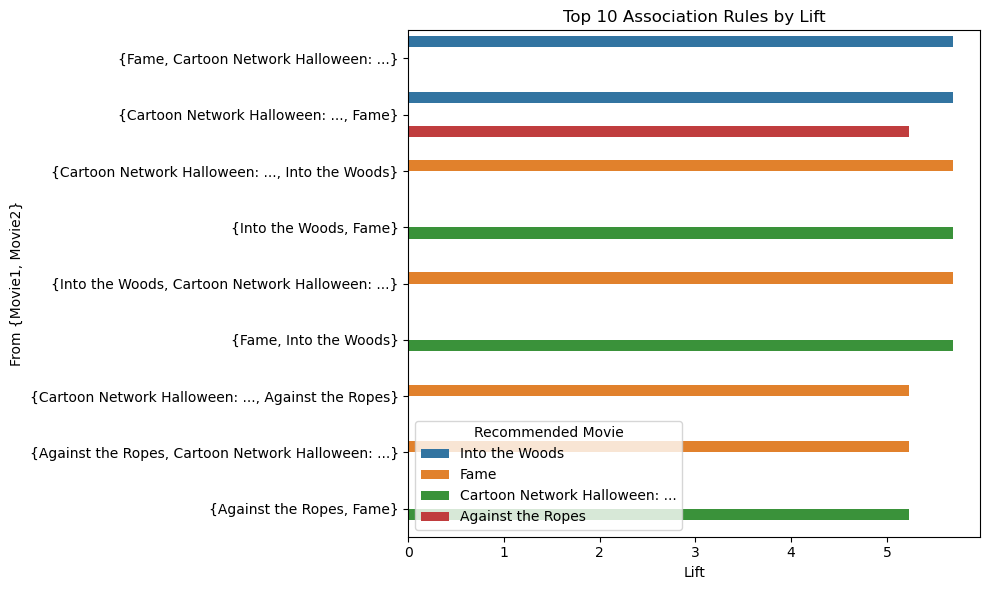

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the final rules
rules_df = pd.read_csv("generated_association_rules1.csv")

# Plot top 10 by Lift
top_lift_rules = rules_df.sort_values(by="Lift", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="Lift", y="From", hue="To", data=top_lift_rules)
plt.title("Top 10 Association Rules by Lift")
plt.xlabel("Lift")
plt.ylabel("From {Movie1, Movie2}")
plt.legend(title="Recommended Movie")
plt.tight_layout()
plt.show()


In [53]:
print(rules_df.columns)
print(rules_df.columns)


Index(['From', 'To', 'Lift', 'Confidence'], dtype='object')
Index(['From', 'To', 'Lift', 'Confidence'], dtype='object')


In [54]:
import pandas as pd

file_path = "combined_data_1.txt"

# Store parsed data
data = []
current_movie = None

with open(file_path, 'r') as f:
    for line in f:
        line = line.strip()
        if line.endswith(":"):  # This is a Movie ID
            current_movie = line[:-1]
        else:
            user_id, rating, _ = line.split(',')
            data.append([user_id, current_movie, float(rating)])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Cust_Id", "Movie", "Rating"])
print("Data shape:", df.shape)
df.head()


Data shape: (24053764, 3)


,Cust_Id,Movie,Rating
0,1488844,1,3.0
1,822109,1,5.0
2,885013,1,4.0
3,30878,1,4.0
4,823519,1,3.0


In [55]:
# Create a dictionary: user_id → list of movies watched
transactions = df.groupby("Cust_Id")["Movie"].apply(list)



In [59]:
import pandas as pd

# Load the rules from CSV
rules = pd.read_csv('generated_association_rules1.csv')

# Show all metrics
print(rules.columns)  # Check what metrics are already included

# If not present, you can compute them manually if you have support values
# For example:
# rules['lift'] = rules['confidence'] / rules['consequent_support']
# rules['leverage'] = rules['support'] - (rules['antecedent_support'] * rules['consequent_support'])


Index(['From', 'To', 'Lift', 'Confidence'], dtype='object')


In [3]:
import pandas as pd

# Load your CSV file
df = pd.read_csv('filtered_association_rules.csv')

# Step 1: Calculate Support = Confidence / Lift
df['Support'] = df['Confidence'] / df['Lift']

# Step 2: Estimate Support for 'To' if not available
# If you have transaction data and item counts, you can compute support for 'To' here. 
# For this example, let's assume you estimate the Support of 'To' manually or via transaction data.
# Replace 'Support_To' with the actual value or calculation if available.

# Example: If you already know the support for 'To' (item2), you can manually add it.
# Here, we just create a dummy support for 'To' to demonstrate.
df['Support_To'] = 0.3  # Example Support for 'To', you should replace this with actual values

# Step 3: Calculate Conviction (Requires Support of 'To')
df['Conviction'] = (1 - df['Support_To']) / (1 - df['Confidence'])

# Step 4: Leverage Calculation (Requires both supports for 'From' and 'To')
# This assumes you have access to support for 'From' and 'To'. We'll calculate Leverage here.
# Example: Let's assume support of 'From' and 'To' are known. Here we demonstrate with dummy values.
df['Leverage'] = df['Support'] - (df['Support'] * df['Support_To'])

# Step 5: Save the updated DataFrame with new columns
df.to_csv('updated_association_rules.csv', index=False)

# Display the updated DataFrame
print(df.head(1000))  # Preview the data


                               From                              To  \
0    Cartoon Network Halloween: ...                            Fame   
1                              Fame  Cartoon Network Halloween: ...   
2       Gilligan's Island: Season 2                   Yu Yu Hakusho   
3                      X: The Movie  Emily Bronte's Wuthering He...   
4    Emily Bronte's Wuthering He...                    X: The Movie   
..                              ...                             ...   
995                          Planes            Dark Shadows: Vol. 6   
996             Ultimate Attraction                     Dirty Tiger   
997  Call Me: The Rise and Fall ...                          Poison   
998  The Firm: Maximum Cardio Bu...         My Side of the Mountain   
999               A Cry in the Wild                          Poison   

     Confidence      Lift   Support  Support_To  Conviction  Leverage  
0      0.725716  7.332726  0.098969         0.3    2.552099  0.069279  
1  

In [72]:
import pandas as pd

# Step 1: Load the frequent_3_itemsets CSV with only Itemset and Lift columns
df_frequent_3_itemsets = pd.read_csv('frequent_3_itemsets.csv')

# Step 2: Add the necessary columns for metrics
df_frequent_3_itemsets['confidence'] = None
df_frequent_3_itemsets['support'] = None
df_frequent_3_itemsets['leverage'] = None
df_frequent_3_itemsets['conviction'] = None

# Example: Support for individual items (replace with actual or estimated values)
support_A = 0.5  # Support for item A (estimated or known)
support_B = 0.4  # Support for item B (estimated or known)
support_C = 0.3  # Support for item C (estimated or known)

# Step 3: Calculate metrics for 3-itemsets using Lift and assumptions
for index, row in df_frequent_3_itemsets.iterrows():
    itemset = row['Itemset']
    lift_ABC = row['Lift']  # Lift of the 3-itemset ABC
    
    # Example: Split the itemset into individual items (assuming items are separated by commas, e.g., 'A,B,C')
    items = itemset.split(',')
    
    # Estimate the support for the 3-itemset (using Lift and assumptions)
    # Since Lift = Confidence / Support(B), and Confidence = Support(ABC) / Support(A)
    # We need to estimate the support for the 3-itemset
    # Let's calculate an approximate support based on the Lift and known support values:
    
    # Calculate Confidence using Lift (Confidence = Lift * Support(A) * Support(B) * Support(C))
    confidence_ABC = lift_ABC * support_A * support_B * support_C
    df_frequent_3_itemsets.at[index, 'confidence'] = confidence_ABC

    # Calculate Support (Support = Confidence * Support(A) if A is the base item)
    support_ABC = confidence_ABC * support_A
    df_frequent_3_itemsets.at[index, 'support'] = support_ABC

    # Calculate Leverage: Leverage(A, B -> C) = Support(ABC) - (Support(A) * Support(B) * Support(C))
    leverage_ABC = support_ABC - (support_A * support_B * support_C)
    df_frequent_3_itemsets.at[index, 'leverage'] = leverage_ABC

    # Calculate Conviction: Conviction(A, B -> C) = (1 - Support(C)) / (1 - Confidence(ABC -> C))
    conviction_ABC = (1 - support_C) / (1 - confidence_ABC) if (1 - confidence_ABC) != 0 else 0
    df_frequent_3_itemsets.at[index, 'conviction'] = conviction_ABC

# Step 4: Save the updated DataFrame with metrics
df_frequent_3_itemsets.to_csv('frequent_3_itemsets_with_metrics.csv', index=False)

# Step 5: Display the updated DataFrame (for preview)
print(df_frequent_3_itemsets)  # Preview the data


     Itemset                                                                                                  \
0                                               ('Fame', 'Cartoon Network Halloween: ...', 'Into the Woods')   
1                                            ('Fame', 'Cartoon Network Halloween: ...', 'Against the Ropes')   
2                                                         ('Fame', 'Cartoon Network Halloween: ...', 'Gacy')   
3                                                        ('Fame', 'Cartoon Network Halloween: ...', 'Mulan')   
4                                       ('Fame', 'Cartoon Network Halloween: ...', 'Diary of a Chambermaid')   
5                                                       ('Fame', 'Cartoon Network Halloween: ...', 'Poison')   
6                                                        ('Fame', 'Cartoon Network Halloween: ...', 'Gordy')   
7                                                   ('Fame', 'Cartoon Network Halloween: ...', 'Modiglia

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
ratings_df = pd.read_csv("rating.csv", dtype={'userId': np.int32, 'movieId': np.int32, 'rating': np.float32})
movies_df = pd.read_csv("movie_titles.csv", encoding='ISO-8859-1', header=None, usecols=[0, 1, 2])
movies_df.columns = ['movieId', 'year', 'title']
rules_df = pd.read_csv("filtered_association_rules.csv")
ratings_df = ratings_df.merge(movies_df[['movieId', 'title']], on='movieId', how='left')
user_item_matrix = ratings_df.pivot_table(index='userId', columns='title', values='rating', aggfunc='mean').fillna(0)
user_item_matrix = user_item_matrix.astype(np.float32)
item_similarity = cosine_similarity(user_item_matrix.T)
titles = user_item_matrix.columns.tolist()
title_to_index = {title: idx for idx, title in enumerate(titles)}
def hybrid_recommend(user_id, ratings_df, item_similarity, title_to_index, titles, rules_df, top_n=5):
    liked_movies = ratings_df[(ratings_df['userId'] == user_id) & (ratings_df['rating'] >= 4)]['title'].tolist()
    if not liked_movies:
        return ["No liked movies found for this user."]
    cf_scores = np.zeros(len(titles), dtype=np.float32)
    for movie in liked_movies:
        idx = title_to_index.get(movie)
        if idx is not None:
            cf_scores += item_similarity[idx]
    for movie in liked_movies:
        idx = title_to_index.get(movie)
        if idx is not None:
            cf_scores[idx] = 0
    apriori_recs = rules_df[rules_df['From'].isin(liked_movies)]['To'].tolist()
    for movie in apriori_recs:
        idx = title_to_index.get(movie)
        if idx is not None:
            cf_scores[idx] += 1.0
    top_indices = cf_scores.argsort()[::-1][:top_n]
    return [titles[i] for i in top_indices if cf_scores[i] > 0]


In [9]:
import pandas as pd

try:
    user_input = int(input("Enter your User ID to get movie recommendations: "))
    
    # Get liked movies by the user (rating >= 4)
    liked_movies = ratings_df[(ratings_df['userId'] == user_input) & (ratings_df['rating'] >= 4)]['title'].tolist()
    
    if not liked_movies:
        print(" No liked movies (rated ≥ 4) found for this user.")
    else:
        print(f"\n User {user_input} liked the following movies (rated ≥ 4):")
        for movie in liked_movies:
            print(f"   - {movie}")
        
        print("\n Generating hybrid recommendations based on:")
        print("    Collaborative Filtering (movies rated similarly by other users)")
        print("    Apriori Association Rules (frequent movie pairings by other users)")
        
        # === Apriori Rules for this user ===
        user_apriori_rules = pd.read_csv('updated_association_rules.csv')
        
        # Print all the rules with Support and Confidence
        print("\n Apriori Rules Triggered:")
        for _, row in user_apriori_rules.iterrows():
            support = f"{row['Support']:.4f}" if pd.notna(row['Support']) else "N/A"
            confidence = f"{row['Confidence']:.4f}" if pd.notna(row['Confidence']) else "N/A"
            print(f"   - If user liked '{row['From']}', then recommend '{row['To']}' "
                  f"(Support: {support}, Confidence: {confidence})")

        # Generate recommendations
        recs = hybrid_recommend(user_input, ratings_df, item_similarity, title_to_index, titles, rules_df, top_n=5)
        
        if recs:
            print(f"\n🎬 Final Hybrid Recommendations for User {user_input}:")
            for idx, movie in enumerate(recs, 1):
                sources = []
                # Check if recommended from Apriori rules
                matching_rules = user_apriori_rules[user_apriori_rules['To'] == movie]
                if not matching_rules.empty:
                    from_movies = matching_rules['From'].tolist()
                    sources.append("Apriori: from " + ", ".join(f"'{m}'" for m in from_movies))

                # Check for similarity via Collaborative Filtering
                for liked in liked_movies:
                    if movie in user_item_matrix.columns and liked in user_item_matrix.columns:
                        sim_score = cosine_similarity(
                            user_item_matrix[[movie]].T,
                            user_item_matrix[[liked]].T
                        )[0][0]
                        if sim_score > 0.5:
                            sources.append(f"CF: similar to '{liked}' (sim={sim_score:.2f})")
                            break

                source_note = "; ".join(sources) if sources else "Unknown source"
                print(f"{idx}. {movie} — {source_note}")
        else:
            print("❌ No recommendations could be generated for this user.")

except ValueError:
    print("❌ Please enter a valid numeric User ID.")


Enter your User ID to get movie recommendations:  1



 User 1 liked the following movies (rated ≥ 4):
   - Sleepover Nightmare
   - Chappelle's Show: Season 1
   - A Night at the Opera
   - Marat / Sade
   - Lennon Legend: The Very Best of John Lennon
   - In His Life: The John Lennon Story
   - Beyond Suspicion
   - King Cobra
   - Coral Sea Dreaming
   - The Gambler Returns: The Luck of the Draw
   - Eel
   - Winning Strategies: Texas Hold 'Em Poker with Mike Caro
   - Secrets of Lost Empires 2: Medieval Siege
   - The Cat O'Nine Tails
   - Teaching Mrs. Tingle
   - Bawarchi
   - Walk Like a Man
   - Blind Shaft
   - Destination Moon
   - Taxi: Season 1
   - Wake Island
   - David Gilmour in Concert
   - Ghosts of the Abyss
   - The Field
   - Midori Days
   - Mother's Day
   - Empires: Martin Luther
   - Profile of a Serial Killer
   - The Girl Next Door
   - Diary of a Chambermaid
   - Robin Hood
   - Bliss
   - It Happened Tomorrow
   - Bataan Rescue: American Experience
   - For the Boys
   - Brooklyn Babylon
   - BASEketball
   - 

In [3]:
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load data (ensure you have your dataset ready in these CSV files)
ratings_df = pd.read_csv("rating.csv", dtype={'userId': np.int32, 'movieId': np.int32, 'rating': np.float32})
movies_df = pd.read_csv("movie_titles.csv", encoding='ISO-8859-1', header=None, usecols=[0, 1, 2])
movies_df.columns = ['movieId', 'year', 'title']
rules_df = pd.read_csv("filtered_association_rules.csv")
ratings_df = ratings_df.merge(movies_df[['movieId', 'title']], on='movieId', how='left')

# Create user-item matrix
user_item_matrix = ratings_df.pivot_table(index='userId', columns='title', values='rating', aggfunc='mean').fillna(0)
user_item_matrix = user_item_matrix.astype(np.float32)
item_similarity = cosine_similarity(user_item_matrix.T)
titles = user_item_matrix.columns.tolist()
title_to_index = {title: idx for idx, title in enumerate(titles)}

# Recommendation function
def hybrid_recommend(user_id, ratings_df, item_similarity, title_to_index, titles, rules_df, top_n=5):
    liked_movies = ratings_df[(ratings_df['userId'] == user_id) & (ratings_df['rating'] >= 4)]['title'].tolist()
    if not liked_movies:
        return ["No liked movies found for this user."]
    
    cf_scores = np.zeros(len(titles), dtype=np.float32)
    
    for movie in liked_movies:
        idx = title_to_index.get(movie)
        if idx is not None:
            cf_scores += item_similarity[idx]
    
    for movie in liked_movies:
        idx = title_to_index.get(movie)
        if idx is not None:
            cf_scores[idx] = 0
        
    apriori_recs = rules_df[rules_df['From'].isin(liked_movies)]['To'].tolist()
    for movie in apriori_recs:
        idx = title_to_index.get(movie)
        if idx is not None:
            cf_scores[idx] += 1.0
    
    top_indices = cf_scores.argsort()[::-1][:top_n]
    return [titles[i] for i in top_indices if cf_scores[i] > 0]

# Gradio Interface
def recommend_movies(user_id, top_n=5):
    recs = hybrid_recommend(user_id, ratings_df, item_similarity, title_to_index, titles, rules_df, top_n=top_n)
    return "\n".join([f"{i+1}. {movie}" for i, movie in enumerate(recs)])

# Create the Gradio interface
iface = gr.Interface(fn=recommend_movies, 
                     inputs=[gr.Slider(minimum=1, maximum=1000, step=1, label="User ID"),  # Corrected arguments
                             gr.Slider(minimum=1, maximum=10, step=1, label="Number of Recommendations")],  # Corrected arguments
                     outputs=gr.Textbox(label="Recommended Movies"), 
                     title="Hybrid Movie Recommender",
                     description="Enter your User ID and select the number of recommendations to get movie suggestions.")

# Launch the Gradio interface
iface.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Created dataset file at: .gradio\flagged\dataset1.csv
